In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# S17_L91 Practical example regression analysis

In [2]:
cars = pd.read_excel("S17_L91\cars2.xlsx")
cars.head()

,Brand,Price,log_price,Mileage,log_mileage,EngineV,Year
0,Mercedes-Benz,222000.0,5.346353,1,0.0,6.3,2016
1,Mercedes-Benz,177000.0,5.247973,1,0.0,5.5,2016
2,Mercedes-Benz,177777.0,5.249876,1,0.0,5.5,2016
3,Mercedes-Benz,199999.0,5.301028,1,0.0,5.5,2016
4,Mercedes-Benz,199999.0,5.301028,1,0.0,5.5,2016


**We want to predict the price of these used cars depeding of the features mentioned in the columns, the regressors**

**These are the features organized based on importance of predicting the value of a car**

1. The first potential regressor is the brand 
2. Mileage is another important feature, the more the car is driven, the cheaper it should be
3. The engine Volumne, sport cars have bigger engines and economic cars have smaller engines
4. Year of pridcution, the older the car the cheaper it is excepting vintage vehicles. 

# Task 1: Finding missing values

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4003 entries, 0 to 4002
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        4003 non-null   object 
 1   Price        4003 non-null   float64
 2   log_price    4003 non-null   float64
 3   Mileage      4003 non-null   int64  
 4   log_mileage  4003 non-null   float64
 5   EngineV      4003 non-null   float64
 6   Year         4003 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 219.0+ KB


Looks like all is fine no missing values. In this course in the case of having missing values it is recommended removing 5% of the data at most.  

In [4]:
cars["Brand"].value_counts() 

Volkswagen       875
Mercedes-Benz    820
BMW              636
Toyota           509
Renault          438
Audi             419
Mitsubishi       306
Name: Brand, dtype: int64

Brand is categorical data, so we are going to use dummy variables, price is the dependent variable of this regressor.

# Task 2: plotting scatterplots, with each independent variable with a dependent variable which in this case is the price of the car.

[]

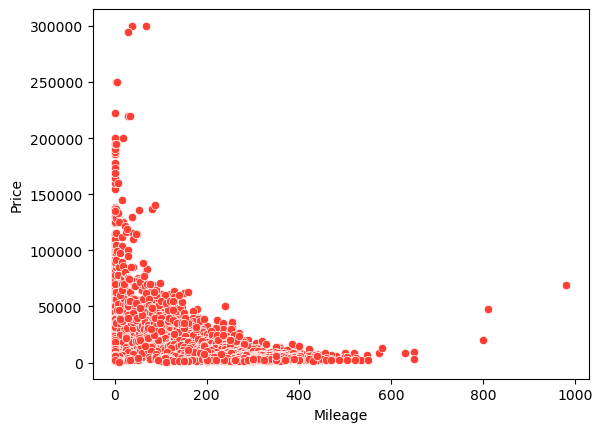

In [5]:
sns.scatterplot(x = cars["Mileage"], y = cars["Price"], data = cars, color = "#ff3f34") # price and Mileage
plt.plot()

[]

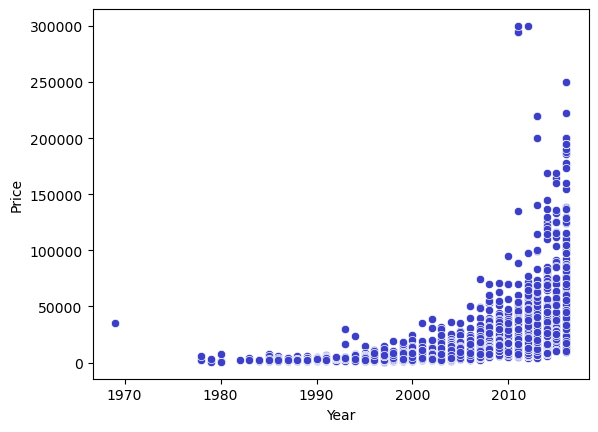

In [6]:
sns.scatterplot(x = cars["Year"], y = cars["Price"], data = cars, color = "#3c40c6") # price and Year
plt.plot()

[]

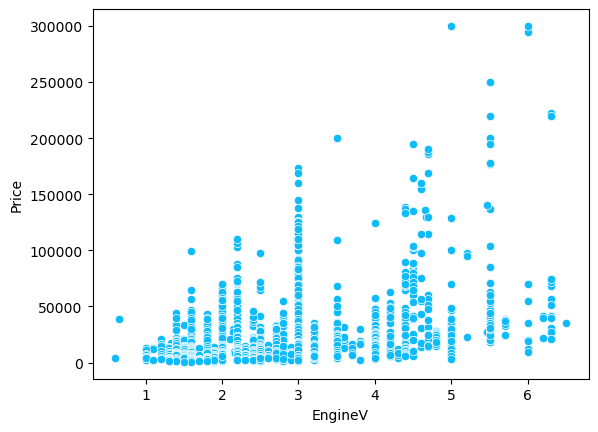

In [7]:
sns.scatterplot(x = cars["EngineV"], y = cars["Price"], data = cars, color = "#0fbcf9") # price and Year
plt.plot()

There are some patterns but definitely non linear patterns, one of the assumptions of linear regression is that the correlation between a dependent and independent variable should be linear, we can fix this changing the data, transform the scale the standard scale, we are going to use **Log transformation** it is especially useful when we are facing exponential scatterplots like these. 

In [8]:
cars["Price"].head()

0    222000.0
1    177000.0
2    177777.0
3    199999.0
4    199999.0
Name: Price, dtype: float64

In [9]:
np.log10(cars["Price"]).head() # in the course we used the log with base 10 but in numpy np.log is with e

0    5.346353
1    5.247973
2    5.249876
3    5.301028
4    5.301028
Name: Price, dtype: float64

The columns of the dataset downloaded from excel have already the logarithmic form in other numerical columns. 

# Taks 3: Plotting the scatter plots with logarithmic transformation and normal version

**Mileage**

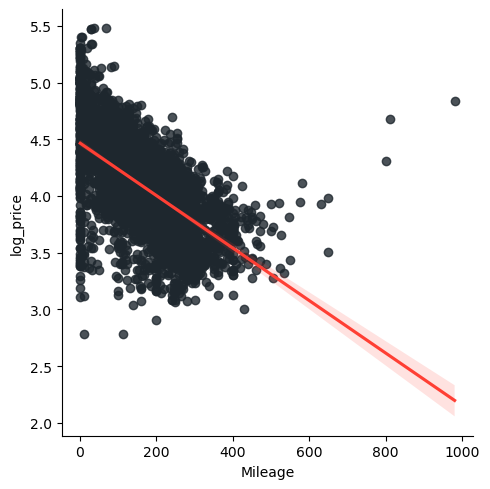

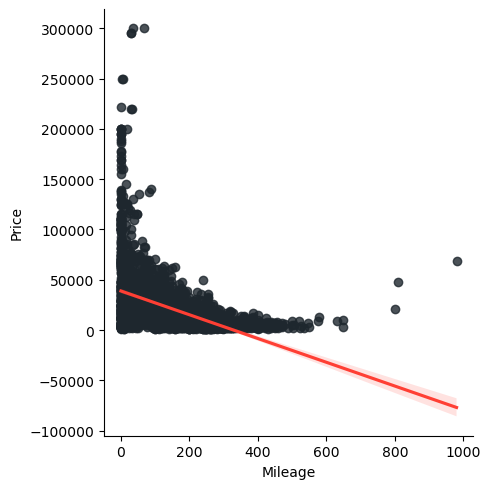

In [10]:
sns.lmplot(y = "log_price", 
           x = "Mileage", 
           data = cars, 
           line_kws={"color": "#ff3f34"},
           scatter_kws={"color": "#1e272e"})

sns.lmplot(y = "Price", 
           x = "Mileage", 
           data = cars, 
           line_kws={"color": "#ff3f34"},
           scatter_kws={"color": "#1e272e"})

plt.show()

**Year**

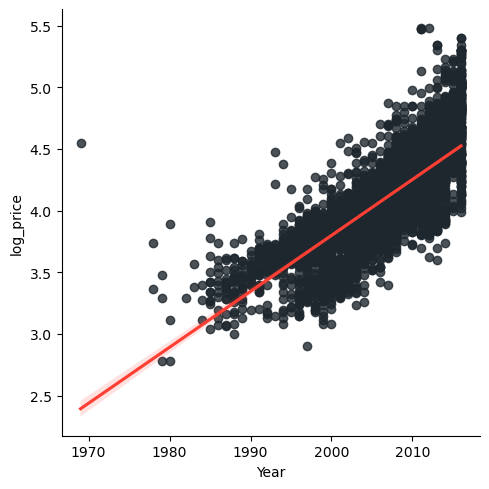

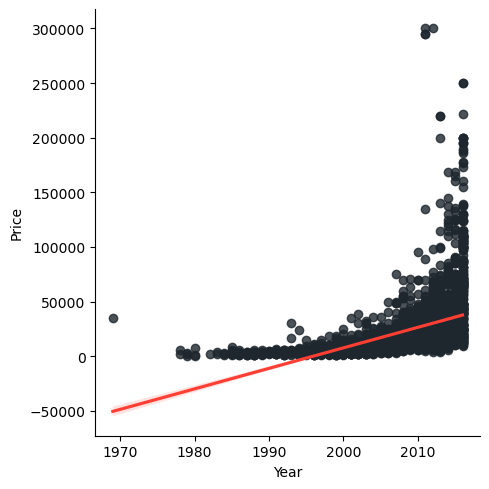

In [11]:
sns.lmplot(y = "log_price", 
           x = "Year", 
           data = cars, 
           line_kws={"color": "#ff3f34"},
           scatter_kws={"color": "#1e272e"})

sns.lmplot(y = "Price", 
           x = "Year", 
           data = cars, 
           line_kws={"color": "#ff3f34"},
           scatter_kws={"color": "#1e272e"})

plt.show()

**Engine V**

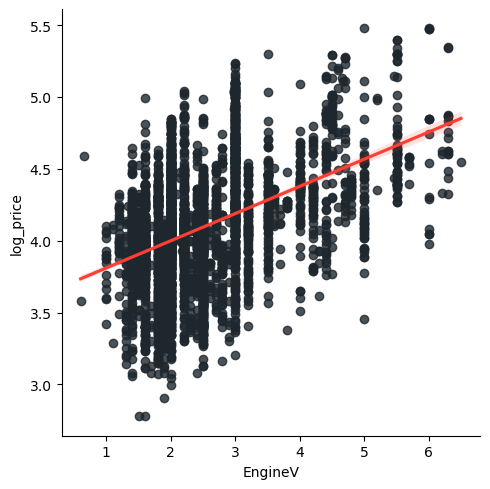

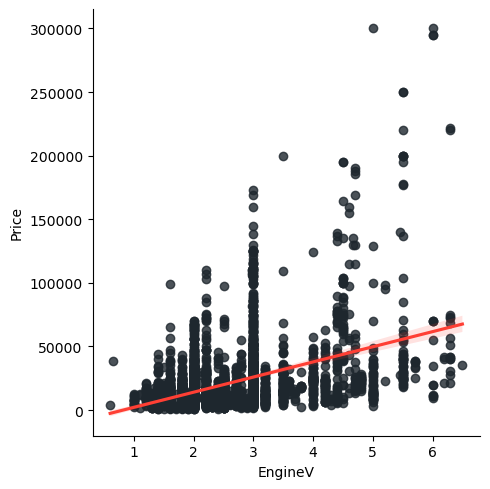

In [12]:
sns.lmplot(y = "log_price", 
           x = "EngineV", 
           data = cars, 
           line_kws={"color": "#ff3f34"},
           scatter_kws={"color": "#1e272e"})

sns.lmplot(y = "Price", 
           x = "EngineV", 
           data = cars, 
           line_kws={"color": "#ff3f34"},
           scatter_kws={"color": "#1e272e"})

plt.show()

The lines fits the data so much better when we see the price in a log10 version. We can have a log price and log mileage scatterplot. 

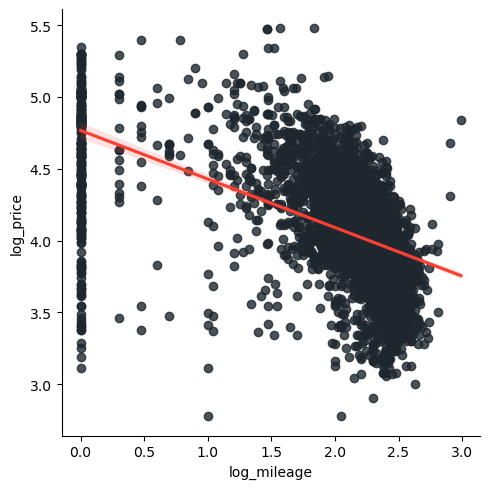

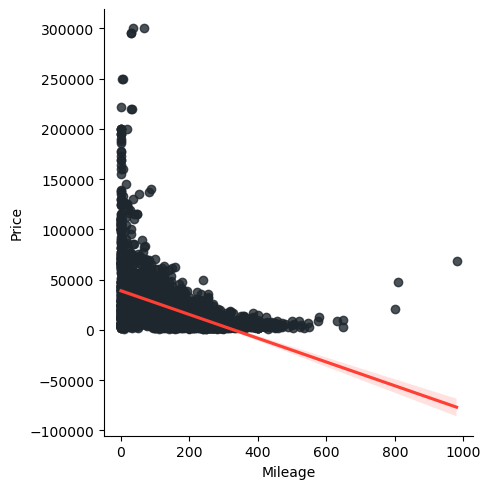

In [13]:
sns.lmplot(y = "log_price", 
           x = "log_mileage", 
           data = cars, 
           line_kws={"color": "#ff3f34"},
           scatter_kws={"color": "#1e272e"})

sns.lmplot(y = "Price", 
           x = "Mileage", 
           data = cars, 
           line_kws={"color": "#ff3f34"},
           scatter_kws={"color": "#1e272e"})

plt.show()

Some Assumptions in regression analysis

**No endogeneity** is not violated

**Normality** is not violated 

**0 mean and homeoscedasticity** (this last one fixed when trasforming to log10) not violated

**No autocorrelationof erros SSE** we have cross sectional data, not time series data. 

**No multicollinearyty**

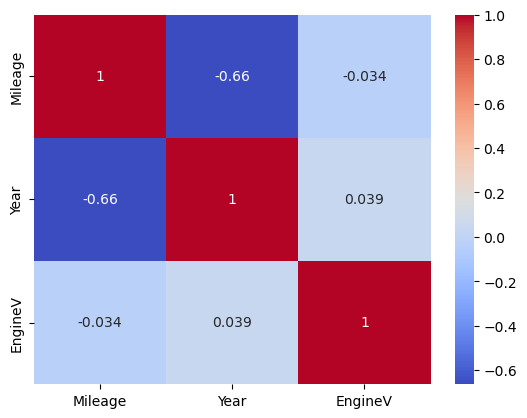

In [14]:
sns.heatmap(cars.loc[:, ["Mileage", "Year", "EngineV"]].corr(numeric_only = True), annot = True, cmap = "coolwarm") 
plt.show()
# there is not correlation between the independent variables we are using. 

# Task 4: Create the dummy variables for categorical data

In [15]:
brands = pd.get_dummies(cars["Brand"])

brands = brands.drop("Volkswagen", axis = 1) # we need to drop the last column to avoid collinearity n -1 dummies
brands.head()

,Audi,BMW,Mercedes-Benz,Mitsubishi,Renault,Toyota
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


# Continue 15/10/2023

# Task 5: Prepare the dataframe for regression

We are going to concatenate the dummies into the original dataframe to use categorical data in a numerical data version, in this manner we can use sklearn and train our model

In [16]:
cars = pd.concat([cars, brands], axis = 1).drop("Brand", axis = 1)

In [17]:
cars.head()

,Price,log_price,Mileage,log_mileage,EngineV,Year,Audi,BMW,Mercedes-Benz,Mitsubishi,Renault,Toyota
0,222000.0,5.346353,1,0.0,6.3,2016,0,0,1,0,0,0
1,177000.0,5.247973,1,0.0,5.5,2016,0,0,1,0,0,0
2,177777.0,5.249876,1,0.0,5.5,2016,0,0,1,0,0,0
3,199999.0,5.301028,1,0.0,5.5,2016,0,0,1,0,0,0
4,199999.0,5.301028,1,0.0,5.5,2016,0,0,1,0,0,0


# Task 6: Train your linear regression model with the cars data. 

In [18]:
cars.columns

Index(['Price', 'log_price', 'Mileage', 'log_mileage', 'EngineV', 'Year',
       'Audi', 'BMW', 'Mercedes-Benz', 'Mitsubishi', 'Renault', 'Toyota'],
      dtype='object')

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = cars.loc[: , ['log_mileage', 
                  'EngineV', 
                  'Year',
                  'Audi', # from this line we satart with the dummies with catehorical data transformed in numerical data. 
                  'BMW', 
                  'Mercedes-Benz', 
                  'Mitsubishi', 
                  'Renault', 
                  'Toyota']]

y = cars["log_price"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

In [22]:
from sklearn.linear_model import LinearRegression 

In [23]:
cars_linear = LinearRegression()

In [24]:
cars_linear.fit(X_train, y_train)

LinearRegression()

In [58]:
predictions = cars_linear.predict(X_test)

# Task 7: Create the summary statistics table with error metrics

In [25]:
from sklearn import metrics

**Standard error** but to match the value of the excel table I computed the Root mean squared error

In [64]:
SE = np.sqrt(metrics.mean_squared_error(y_test, predictions)) #this is the Standard error on the excel table, the RMSE  
SE

0.18045021006380038

**R squared**

In [66]:
r_squared = metrics.explained_variance_score(y_test, predictions)
r_squared

0.8093033925738338

**Adjusted R squared**

Adjusted R-squared = 1 - (1 - R-squared) * ((n - 1)/(n - k - 1))

where:

1. R-squared is the R-squared value of the model
2. n is the sample size
3. k is the number of independent variables in the model

In [70]:
adjusted_r_squared = 1 - (1 - r_squared) * ((len(predictions) - 1) / (len(predictions) - 10 - 1))
adjusted_r_squared

0.8077009000744542

**Number of observations**

In [72]:
observations = len(predictions)
observations

1201

**Summary Table**

In [75]:
pd.DataFrame({"Metrics" : ["r_squared", "adjusted_r_squared", "SE", "observations"],
              "Values" : [r_squared, adjusted_r_squared, SE, observations]})

,Metrics,Values
0,r_squared,0.809303
1,adjusted_r_squared,0.807701
2,SE,0.180450
3,observations,1201.000000


# Finding the coefficients

In [48]:
df = pd.DataFrame({"Independent Variables" : cars_linear.feature_names_in_,
             "Coefficients" : cars_linear.coef_})

In [49]:
intercept = round(cars_linear.intercept_, 2)

In [50]:
df.loc[len(df)] = ["Intercept", intercept]

In [51]:
df.sort_values(by = "Coefficients")

,Independent Variables,Coefficients
9,Intercept,-77.850000
7,Renault,-0.165139
0,log_mileage,-0.102963
6,Mitsubishi,-0.049391
8,Toyota,0.038317
2,Year,0.040754
3,Audi,0.066310
5,Mercedes-Benz,0.103861
4,BMW,0.114323
1,EngineV,0.140377
